In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pdf-malware-2022-dataset/PDFMalware2022.csv


In [2]:
data = pd.read_csv("../input/pdf-malware-2022-dataset/PDFMalware2022.csv")

In [3]:
data.head()

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,...,0,1,0,0,0,0,0,0,0.0,Malicious
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,...,0,0,1,0,0,0,8,1,0.0,Malicious
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,...,0,1,1,0,0,0,0,0,0.0,Malicious
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious


In [4]:
# We use this command just to see how many files are either malicious/not malicious (benign).
data.groupby('Class').size()

Class
Benign       4468
Malicious    5557
dtype: int64

The website for the data set specified that there would be 4,468 benign records and 5,557 malicious records, which seems to be accurate with our findings.

To start with this project I first want to figure out by comparing malicious PDF files with benign PDF files and see if there is any noticable difference between the two categories when compared with different files.

<AxesSubplot:ylabel='Class'>

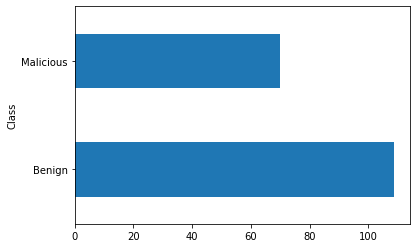

In [5]:
data.groupby('Class').pdfsize.mean().plot.barh()

<AxesSubplot:ylabel='Class'>

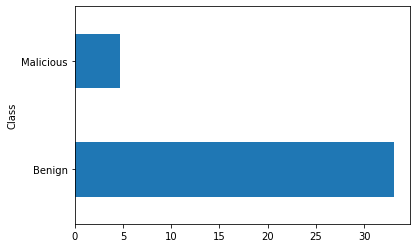

In [6]:
data.groupby('Class').stream.mean().plot.barh()

<AxesSubplot:ylabel='Class'>

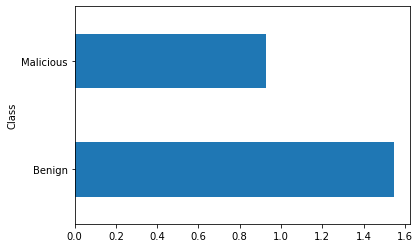

In [7]:
data.groupby('Class').trailer.mean().plot.barh()

<AxesSubplot:ylabel='Class'>

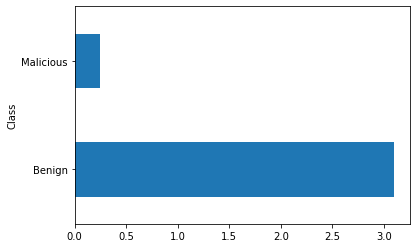

In [8]:
data.groupby('Class').ObjStm.mean().plot.barh()

<AxesSubplot:ylabel='Class'>

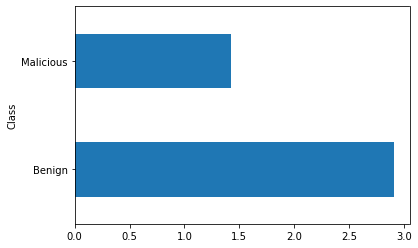

In [9]:
data.groupby('Class').Colors.mean().plot.barh()

After making bar plots to figure out what information I can gather, I found that compared to malicious PDF files that benign PDF files tend to have more colors, stream objects, rich media (keywords), stream, and a larger PDF size.

Conclusions from Bar Charts: What my conclusions came down to is that the PDF file's stream size and stream objects is a good indicator on if a file may be malicious. As we can see from the bar charts above these two categories show the greatest difference in means between the malicious and benign categories. Not to mention, I believe that because most hackers are trying to create malicious files as quickly as possible to maximize efficieny, it may be possible take short cuts such as adding less stream objects when compare to the typical benign PDF file. We may be able to use this to our advantage by flagging PDF files with small stream sizes and less stream objects.

In [10]:
def suspicious_func(df):
    if ((df['stream'] >= 7) or (df['ObjStm'] >= 0.5)):
        return 'Not Suspicious'
    else:
        return 'Suspicious'
    
data['suspicious'] = data.apply(suspicious_func, axis = 1)

data


,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class,suspicious
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,...,1,0,0,0,0,0,0,0.0,Malicious,Suspicious
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,...,0,1,0,0,0,8,1,0.0,Malicious,Not Suspicious
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,...,1,0,0,0,0,0,0,0.0,Malicious,Suspicious
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,...,1,1,0,0,0,0,0,0.0,Malicious,Suspicious
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,...,1,0,0,0,0,0,0,0.0,Malicious,Suspicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,908f8e3411d1bdf5e0fa7ca953c85cc4f133729fd4c71a...,529.0,296.0,1.0,87.0,8.0,0.0,0.0,3,No,...,1,0,0,0,0,0,0,0.0,Malicious,Suspicious
10022,72654b36f6a240d953a9ce3e898a4dfa381031ba7f5e2a...,73.0,314.0,1.0,16.0,3.0,0.0,0.0,-1,unclear,...,1,0,0,0,0,0,0,0.0,Malicious,Suspicious
10023,dad02289bc442e235961f4cf87cbde364a2250bdc57632...,4.0,377.0,2.0,13.0,11.0,0.0,0.0,0,Yes,...,1,0,0,0,0,0,0,0.0,Malicious,Suspicious
10024,b219390e223ea263476d65277d00804cfd0a93023e1903...,38.0,338.0,1.0,200006.0,13.0,0.0,0.0,0,Yes,...,1,0,0,0,0,0,0,0.0,Malicious,Suspicious


So what I did with above function is I looked at a value where we start to see PDF files seperate from malicious to benign. For the stream that value is 0.5 and for stream objects that value was 7. Then I made a new column in the CSV that distinguishes between if we should be suspicious or not suspicious of the PDF file.

In [11]:
data.groupby('suspicious').size()

suspicious
Not Suspicious    4442
Suspicious        5584
dtype: int64

In [12]:
data.groupby('Class').size()

Class
Benign       4468
Malicious    5557
dtype: int64

So as we can see comparing the suspicious column with the class column our results very accurate. As in a csv of 10,000 files on 26 of those files could be marked as false positives. Which is very accurate and could be very useful to Interstates when simply just trying to figure out the malicious possibility of a PDF file.

Going forward this method won't guarantee that a PDF file is indeed safe to open, as there are no real guarantees as technology continues to advance. However we can use this method to atleast give us an idea for every PDF file that enters the organization to make sure if it is malicious or not before opening it. Since at the end of the day having some idea is better than having no idea at all.

In [13]:
x = data['pdfsize'].values
y = data['ObjStm'].values

mean_x = np.mean(x)
mean_y = np.mean(y)

print(mean_y)

nan
